In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='e2b5b5a4-9ebe-41e4-8e02-fd53d02377a7', project_access_token='p-b3754d05f2f69387eb6daeb3439106dc4b4bb5a7')
pc = project.project_context


# Team Assignment 1: EDA of Bakery Sales 

Our team’s task was to analyze the data of a small bakery in the historic district of Edinburgh (Scotland) that is struggling with its assortment, and to develop recommendations that would make it more profitable. There are multiple aspects we could have chosen to look into. Since we found that labor costs can have a large cost on bakeries bottom line we chose to look into how we could reccomend a more effective staffing plan. Our reccomendations will also affect hours which can give the bakers more time to think about and plan assortment as well as spend time with their family. 

## Problem: How can we optimize the staffing schedule to increase net income and customer experience?

## Start by importing the python packages you will need for your analysis

In [2]:
# import the packages you will need for your analysis here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Now import the data set (csv file)into a pandas data frame

In [3]:
bakery_file = project.get_file('BreadBasket_DMS.csv') # using token the access the file
bakery = pd.read_csv(bakery_file)

## Let's remove records with missing data

In [4]:
# clean the dataset because some items here are missing.
# Hint: the missing data is represented as 'NONE'
bakery = bakery.drop(bakery[bakery.Item == 'NONE'].index)
clean_sku_count = bakery.Item.count()  # clean item count

## Now let's use the date and time columns to add more helpful categorizations

In [5]:
bakery.Date = pd.to_datetime(bakery.Date) 
bakery.Time = pd.to_datetime(bakery.Time)
bakery['Hour'] = bakery.Time.dt.strftime('%I %p')
bakery['Hour Num'] = bakery.Time.dt.hour
bakery['Weekday'] = bakery.Date.dt.weekday_name
bakery.head()

,Date,Time,Transaction,Item,Hour,Hour Num,Weekday
0,2016-10-30,2020-02-04 09:58:11,1,Bread,09 AM,9,Sunday
1,2016-10-30,2020-02-04 10:05:34,2,Scandinavian,10 AM,10,Sunday
2,2016-10-30,2020-02-04 10:05:34,2,Scandinavian,10 AM,10,Sunday
3,2016-10-30,2020-02-04 10:07:57,3,Hot chocolate,10 AM,10,Sunday
4,2016-10-30,2020-02-04 10:07:57,3,Jam,10 AM,10,Sunday


## Now that we have those categories let's take a first look at the data to see if there are any outliers

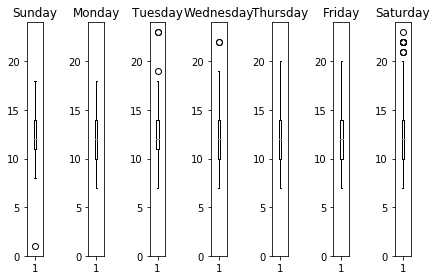

In [6]:
plt.subplot(1, 7, 1)
sun_bakery = bakery[bakery['Weekday'] == 'Sunday']
plt.boxplot(sun_bakery['Hour Num'])
plt.title('Sunday')
plt.ylim(0,24)
plt.subplot(1,7,2)
mon_bakery = bakery[bakery['Weekday'] == 'Monday']
plt.boxplot(mon_bakery['Hour Num'])
plt.title('Monday')
plt.ylim(0,24)
plt.subplot(1,7,3)
tues_bakery = bakery[bakery['Weekday'] == 'Tuesday']
plt.boxplot(tues_bakery['Hour Num'])
plt.title('Tuesday')
plt.ylim(0,24)
plt.subplot(1,7,4)
wed_bakery = bakery[bakery['Weekday'] == 'Wednesday']
plt.boxplot(wed_bakery['Hour Num'])
plt.title('Wednesday')
plt.ylim(0,24)
plt.subplot(1,7,5)
thurs_bakery = bakery[bakery['Weekday'] == 'Thursday']
plt.boxplot(thurs_bakery['Hour Num'])
plt.title('Thursday')
plt.ylim(0,24)
plt.subplot(1,7,6)
fri_bakery = bakery[bakery['Weekday'] == 'Friday']
plt.boxplot(fri_bakery['Hour Num'])
plt.title('Friday')
plt.ylim(0,24)
plt.subplot(1,7,7)
sat_bakery = bakery[bakery['Weekday'] == 'Saturday']
plt.boxplot(sat_bakery['Hour Num'])
plt.title('Saturday')
plt.ylim(0,24)
plt.tight_layout()
plt.show()

It appears we have some weird records late on some days as well as early on Sunday. Let's pull up these full records to see what they mean.

In [7]:
time_outliers = bakery[bakery['Hour Num'].isin([21,22,23,24,1,2])]
time_outliers

,Date,Time,Transaction,Item,Hour,Hour Num,Weekday
7056,2016-12-17,2020-02-04 21:42:13,3387,Hot chocolate,09 PM,21,Saturday
7057,2016-12-17,2020-02-04 21:42:13,3387,Hot chocolate,09 PM,21,Saturday
8561,2017-01-01,2020-02-04 01:21:05,4090,Bread,01 AM,1,Sunday
14123,2017-02-14,2020-02-04 23:29:03,6588,Valentine's card,11 PM,23,Tuesday
14124,2017-02-14,2020-02-04 23:38:41,6589,Valentine's card,11 PM,23,Tuesday
20788,2017-04-05,2020-02-04 22:15:55,9448,Juice,10 PM,22,Wednesday
20789,2017-04-05,2020-02-04 22:15:55,9448,Mineral water,10 PM,22,Wednesday
21213,2017-04-08,2020-02-04 21:43:15,9637,Vegan Feast,09 PM,21,Saturday
21214,2017-04-08,2020-02-04 22:41:09,9638,Vegan Feast,10 PM,22,Saturday
21215,2017-04-08,2020-02-04 22:43:06,9640,Vegan Feast,10 PM,22,Saturday


It appears that these were mostly for special occasions and if not then are most likely mistakes.Whatever they are they do not make sense to include in a usual week at EDA so we are going to drop them for further analysis.

In [8]:
remove = list(time_outliers.Transaction.unique())
bakery = bakery.drop(bakery[bakery.Transaction.isin(remove)].index)

## Now that we have removed the outliers let's look to see if there are any obvioius insights in staffing based on average sale per day and hour

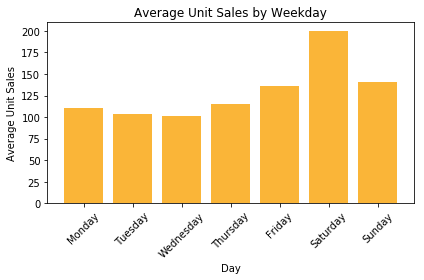

In [9]:
temp_bakery = bakery.groupby(['Date', 'Weekday'], as_index = False).count()
trans_by_weekday = temp_bakery.groupby('Weekday').agg({'Transaction' : 'mean'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.bar(trans_by_weekday.index, trans_by_weekday['Transaction'], color = (.98,.71,.22,1))
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.ylabel('Average Unit Sales')
plt.title('Average Unit Sales by Weekday')
plt.tight_layout()
plt.show()

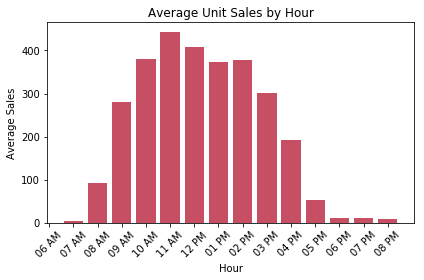

In [10]:
temp_bakery = bakery.groupby(['Hour', 'Weekday'], as_index = False).count()
trans_by_hour = temp_bakery.groupby('Hour').agg({'Transaction': 'mean'}).reindex(['06 AM','07 AM','08 AM','09 AM','10 AM','11 AM','12 PM','01 PM','02 PM' ,'03 PM','04 PM','05 PM','06 PM','07 PM','08 PM'])
plt.bar(trans_by_hour.index, trans_by_hour['Transaction'], color = (.78,.31,.39,1))
plt.xlabel('Hour')
plt.xticks(rotation = 45)
plt.ylabel('Average Sales')
plt.title('Average Unit Sales by Hour')
plt.tight_layout()
plt.show()

## Insights
After looking at these two graphs it is clear that the bakery could probably use more staff on Saturdays and is open for some hours that might not be profitable. Now, let's take this a step further with some outside data to quantify these observations.

In [11]:
top_10 = bakery.Item.value_counts().sort_values(ascending = False).head(10)
top_10_list = list(top_10.index)
print(top_10_list)
total_count = bakery.Item.count()
only_top_10 = bakery[bakery['Item'].isin(top_10_list)]
top_10_count = only_top_10.Item.count()
print(top_10_count / total_count)

['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']
0.732236970525083


To quantify the observations we have to assign prices to each SKU but with 94 SKUs this could become tedious and unessary so we are only going to find this data for the top 10 most sold SKUs since these make up 73% of all unit sales. The rest will be assigned the average of these top 10.

For markups/profit margins we will break the offerings into beverages and food since these typically have similar markups.

In [12]:
known_prices = {
    'Coffee': 2.66,
'Bread': 3.10,
'Tea': 2.59,
'Cake': 4.94,
'Pastry': 2.13,
'Sandwich': 6.09,
'Medialuna': 2.13,
'Hot chocolate': 2.78,
'Cookies': 1.46,
'Brownie': 2.34
} #sources in write-up; all in pounds
total = 0
count = 0
for key in known_prices:
    total += known_prices[key]
    count += 1
avg_price = total / count
#will be used for all other SKUs (Top 10 used make up 73% of sales)
sku_list = list(bakery.Item.unique())
prices = dict.fromkeys(sku_list, avg_price) #initialize price dictionary with each item having average price
for key in known_prices:
    prices[key] = known_prices[key] #relabel top 10 items with more accurate price
beverages = ['Hot chocolate', 'Tea','Coffee','Smoothies','Mineral Water','Juice','Coke'] #based on qualitative analysis of SKUs
food_markup = .65 #based on typical food costs from yourbusiness.com
beverage_markup = .75 #based on typical coffee margins from smallbusiness.com
markup = dict.fromkeys(list(bakery.Item.unique()), food_markup ) #iniitalize all with food markup
for key in markup:
    if key in beverages:
        markup[key] = beverage_markup #relabel beverages with beverage markup
bakery['Profit'] = [(markup[x] * prices[x]) for x in list(bakery['Item'])] #calculate new profit column for each sale
bakery.head()

,Date,Time,Transaction,Item,Hour,Hour Num,Weekday,Profit
0,2016-10-30,2020-02-04 09:58:11,1,Bread,09 AM,9,Sunday,2.0150
1,2016-10-30,2020-02-04 10:05:34,2,Scandinavian,10 AM,10,Sunday,1.9643
2,2016-10-30,2020-02-04 10:05:34,2,Scandinavian,10 AM,10,Sunday,1.9643
3,2016-10-30,2020-02-04 10:07:57,3,Hot chocolate,10 AM,10,Sunday,2.0850
4,2016-10-30,2020-02-04 10:07:57,3,Jam,10 AM,10,Sunday,1.9643


## Now we can group the data by weekday and hour to get more applicable results

In [13]:
avg_sales_per_trans = len(bakery.Transaction) / len(bakery.Transaction.unique())
#this number will be used to convert sales data back to transaction data to more accurately estimate number of cashiers needed

temp_bakery = bakery.groupby(['Date', 'Weekday'], as_index = False).count()
num_weekdays = temp_bakery.Weekday.value_counts()
# num_weekdays is used to find average sales per hour, using the simple average would ignore days in which no sales were made

hours_plan = bakery.groupby(['Weekday','Hour','Hour Num'], as_index = False).agg({'Profit' : ['sum','count']}).sort_values(by = ['Weekday','Hour Num'])
hours_plan['Number of Days'] = [num_weekdays[x] for x in list(hours_plan['Weekday'])]
hours_plan['Average Gross Profit per Hour'] = hours_plan['Profit']['sum'] / hours_plan['Number of Days']

hours_plan['Average Transactions per Hour'] = hours_plan['Profit']['count'] / hours_plan['Number of Days'] / avg_sales_per_trans
hours_plan.head()

Weekday   Hour Hour Num    Profit       Number of Days  \
                                 sum count                  
6   Friday  07 AM        7    1.3845     1             23   
8   Friday  08 AM        8  272.0299   144             23   
10  Friday  09 AM        9  740.7649   385             23   
11  Friday  10 AM       10  758.7258   392             23   
12  Friday  11 AM       11  863.8246   427             23   

   Average Gross Profit per Hour Average Transactions per Hour  
                                                                
6                       0.060196                      0.020054  
8                      11.827387                      2.887846  
10                     32.207170                      7.720977  
11                     32.988078                      7.861358  
12                     37.557591                      8.563265

## Next we will include the labor costs based on how many cashiers are needed

In [14]:
cost_per_emp_hour = 8.21 #minimum wage in Scotland
two_emp_threshold = 19.4 #based on report with average transactions per cashier
#Columns below help decide when EDA will be open and when they will need two employees. It then uses this to calculate profitability
hours_plan['Profitable Hour?'] = hours_plan['Average Gross Profit per Hour'] > cost_per_emp_hour
hours_plan['Two Cashiers Needed?'] = hours_plan['Average Transactions per Hour'] > two_emp_threshold
hours_plan['Profit After Labor'] = hours_plan['Average Gross Profit per Hour']  - ((1+ (1 * hours_plan['Two Cashiers Needed?'])) * cost_per_emp_hour)
#Profitability Takes (Sales per Hour * Revenue per Sales * Profit Margin) - Cost of Cashier Labor(if one or two are used)
#Overhead and the salary that the baker takes are not included in this profit
hours_plan.head()

Weekday   Hour Hour Num    Profit       Number of Days  \
                                 sum count                  
6   Friday  07 AM        7    1.3845     1             23   
8   Friday  08 AM        8  272.0299   144             23   
10  Friday  09 AM        9  740.7649   385             23   
11  Friday  10 AM       10  758.7258   392             23   
12  Friday  11 AM       11  863.8246   427             23   

   Average Gross Profit per Hour Average Transactions per Hour  \
                                                                 
6                       0.060196                      0.020054   
8                      11.827387                      2.887846   
10                     32.207170                      7.720977   
11                     32.988078                      7.861358   
12                     37.557591                      8.563265   

   Profitable Hour? Two Cashiers Needed? Profit After Labor  
                                                             
6             False                False          -8.149804  
8              True                False           3.617387  
10             True                False          23.997170  
11             True                False          24.778078  
12             True                False          29.347591

Here we have used the Average Gross Profit per Hour and then with outside data came up with Profitability and when we will need to employ 1 vs 2 cashiers. Turns out that EDA's traffic is slow enough that multiple cashiers does not make sense on a regular basis. It seems the probems mentioned in the case might have been a (un)lucky day in which the traffic was very concentrated.

## Now Let's Visualize the Profitability based on the hour of the day
This profit is ignoring overhead and the bakers salary and is assuming only one cashier is employed.

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


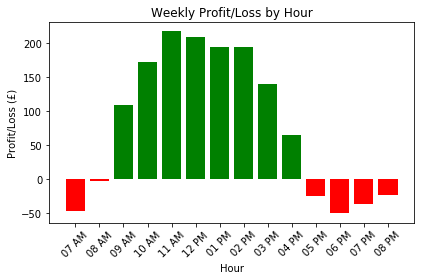

In [15]:
prof_by_hour = hours_plan.groupby(['Hour', 'Hour Num'], as_index = False).agg({'Profit After Labor' : 'sum'}).sort_values(by = ['Hour Num'])
#profitability broken out by hour
prof_by_hour['Positive'] = prof_by_hour['Profit After Labor'] > 0 #used to denote color
plt.bar(prof_by_hour['Hour'], prof_by_hour['Profit After Labor'], color = prof_by_hour.Positive.map({True : 'g', False : 'r'})) #color mapping idea from Stack Overflow TomAugspurger
plt.xlabel('Hour')
plt.xticks(rotation = 45)
plt.ylabel("Profit/Loss (£)")
plt.title('Weekly Profit/Loss by Hour')
plt.tight_layout()
plt.show()

This confirms what we found earlier that some hours are not profitable for EDA and they should therefore close during those hours.

## Next we can quantify the savings of closing during these hours thus reducing labor costs

In [16]:
profitability_change = hours_plan.groupby(['Profitable Hour?']).agg({'Profit After Labor' : 'sum'})
weekly_prof_before = profitability_change.iloc[0,0] + profitability_change.iloc[1,0]
weekly_prof_after = profitability_change.iloc[1,0]
weekly_perc_inc = ((weekly_prof_after / weekly_prof_before) - 1) * 100
print('Weekly Profits Before: £%.2f' % weekly_prof_before)
print('Weekly Profits After: £%.2f' % weekly_prof_after)
print("Profits will increase by %.2f%% each week" % weekly_perc_inc)

Weekly Profits Before: £1113.94
Weekly Profits After: £1309.11
Profits will increase by 17.52% each week


## Let's make the new schedule readable

In [17]:
schedule = {
    'Monday': [],
    'Tuesday': [],
    'Wednesday': [],
    'Thursday': [],
    'Friday': [],
    'Saturday': [],
    'Sunday': []
}
for index, row in hours_plan.iterrows():
    if row['Profitable Hour?'].bool():
        schedule[row['Weekday'].values[0]].append(row['Hour'].values[0])
print('Weekly Schedule is:')
for key in schedule.keys():
    items = schedule[key]
    print(key + ': ' + items[0] + ' - ' + items[-1])

Weekly Schedule is:
Monday: 09 AM - 04 PM
Tuesday: 09 AM - 04 PM
Wednesday: 09 AM - 04 PM
Thursday: 09 AM - 04 PM
Friday: 08 AM - 04 PM
Saturday: 08 AM - 04 PM
Sunday: 09 AM - 03 PM


## Finally we can export the table to present to ownership with details of our analysis

In [18]:
new_csv_file = hours_plan.to_csv(index=True) # this takes a Pandas dataframe and makes it a csv file

project.save_data("final_hours_plan.csv", new_csv_file, set_project_asset=True, overwrite=True)

{'file_name': 'final_hours_plan.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'busi488group1exercise1-donotdelete-pr-1fgmehvtiamjwg',
 'asset_id': 'f0e1933a-96d7-4fda-b9ac-adbab9d23541'}